# Explore here

In [17]:
# Your code here
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump

In [18]:
main_data= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [19]:
main_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
main_data_update = main_data[['MedInc','Latitude','Longitude']]

In [21]:
main_data_update

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [22]:
main_data_update.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [23]:
main_data_update.shape

(20640, 3)

In [24]:
X_train, X_test = train_test_split(main_data_update,test_size=0.2,random_state=25)

In [25]:
model=KMeans(n_clusters=6,n_init='auto',random_state=25)
model.fit(X_train)

KMeans(n_clusters=6, random_state=25)

In [26]:
y_train=list(model.labels_)
X_train['cluster']=y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14105,1.0617,32.75,-117.10,0
20250,3.2847,34.24,-119.18,0
5191,1.5256,33.93,-118.26,0
664,3.9702,37.70,-122.14,5
8557,4.7319,33.93,-118.40,4


In [27]:
X_test.head()

,MedInc,Latitude,Longitude
73,0.4999,37.81,-122.29
8944,2.9167,34.01,-118.47
3737,3.4013,34.17,-118.40
19092,6.2040,38.24,-122.62
9493,3.2500,39.37,-123.75


In [31]:
X_test = X_test[X_train.columns] # Predict using the model predictions = model.predict(X_test)

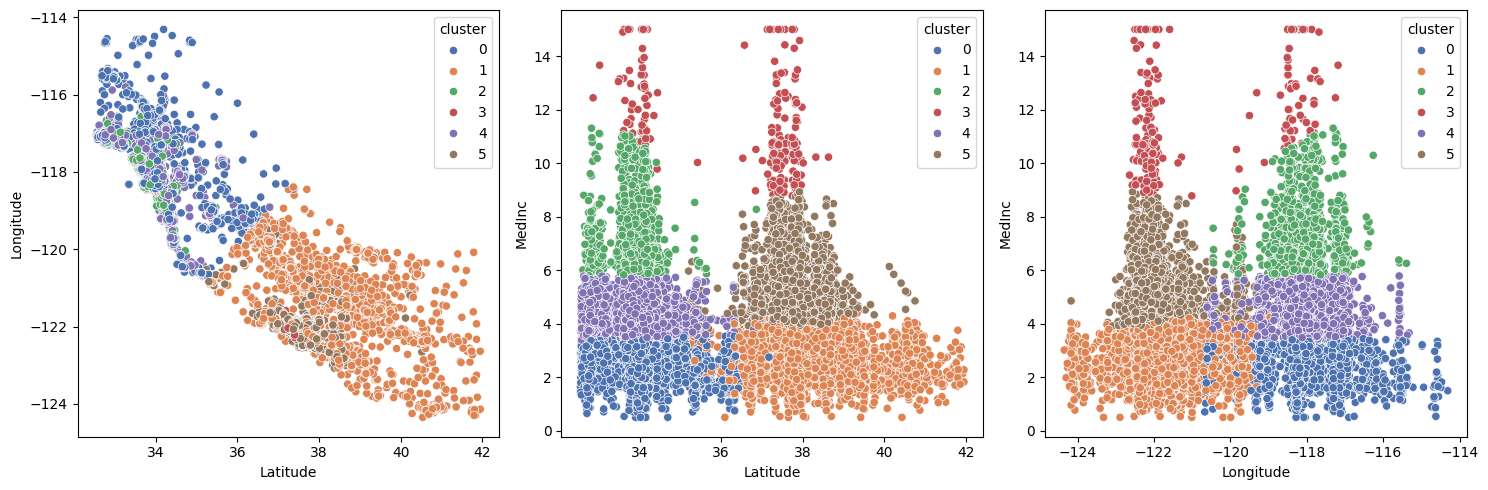

In [28]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue="cluster", palette="deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue="cluster", palette="deep")
plt.tight_layout()

plt.show()

In [32]:
model=KMeans(n_clusters=6,n_init='auto',random_state=25)
model.fit(X_train)

KMeans(n_clusters=6, random_state=25)

In [33]:
y_test=list(model.predict(X_test))
X_test['cluster']= y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
73,0.4999,37.81,-122.29,3
8944,2.9167,34.01,-118.47,0
3737,3.4013,34.17,-118.40,0
19092,6.2040,38.24,-122.62,1
9493,3.2500,39.37,-123.75,3


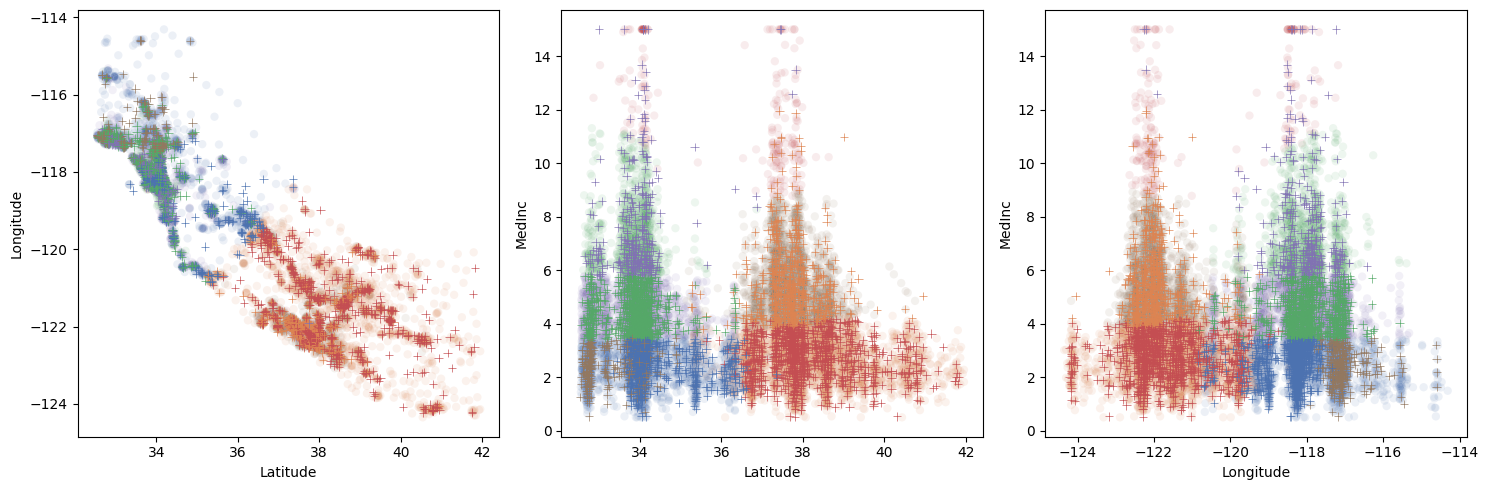

In [34]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [35]:
DT_model = DecisionTreeClassifier(random_state = 123)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

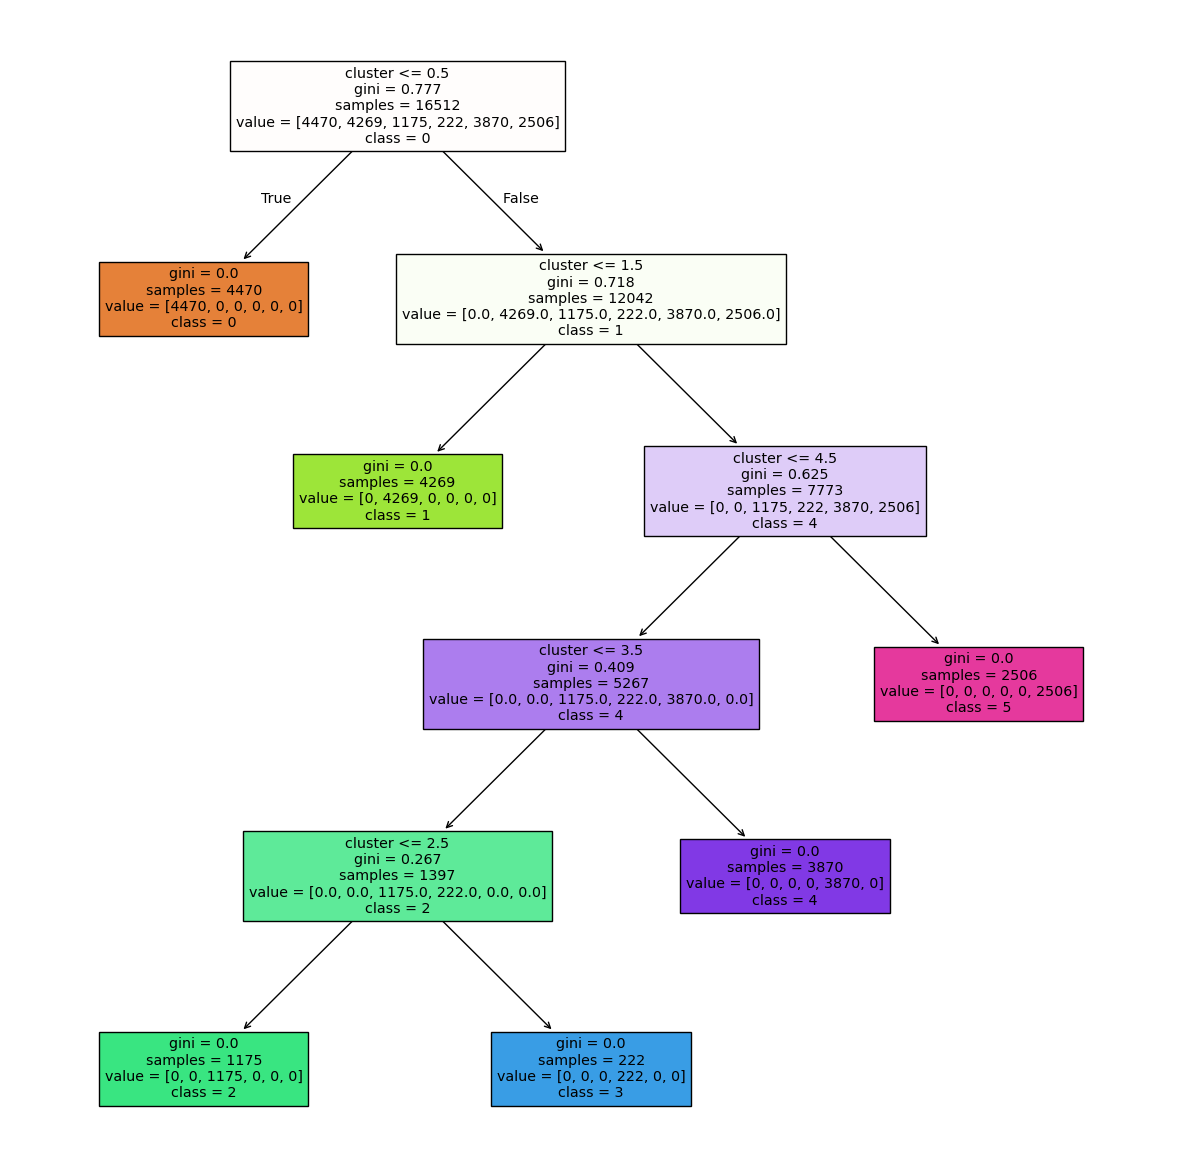

In [36]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(DT_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [37]:
y_pred=DT_model.predict(X_test)
y_pred

array([3, 0, 0, ..., 1, 1, 1], dtype=int32)

In [38]:
accuracy_score(y_test,y_pred)

1.0